In [1]:
# load dataset
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine['target']

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [2]:
# # EDA

print(f'5 Dataset teratas:\n {df.head()}')
print(f'Cek Missing Values:\n {df.isnull().sum()}')
print(f'5 Dataset teratas:\n {df.head()}')

5 Dataset teratas:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  

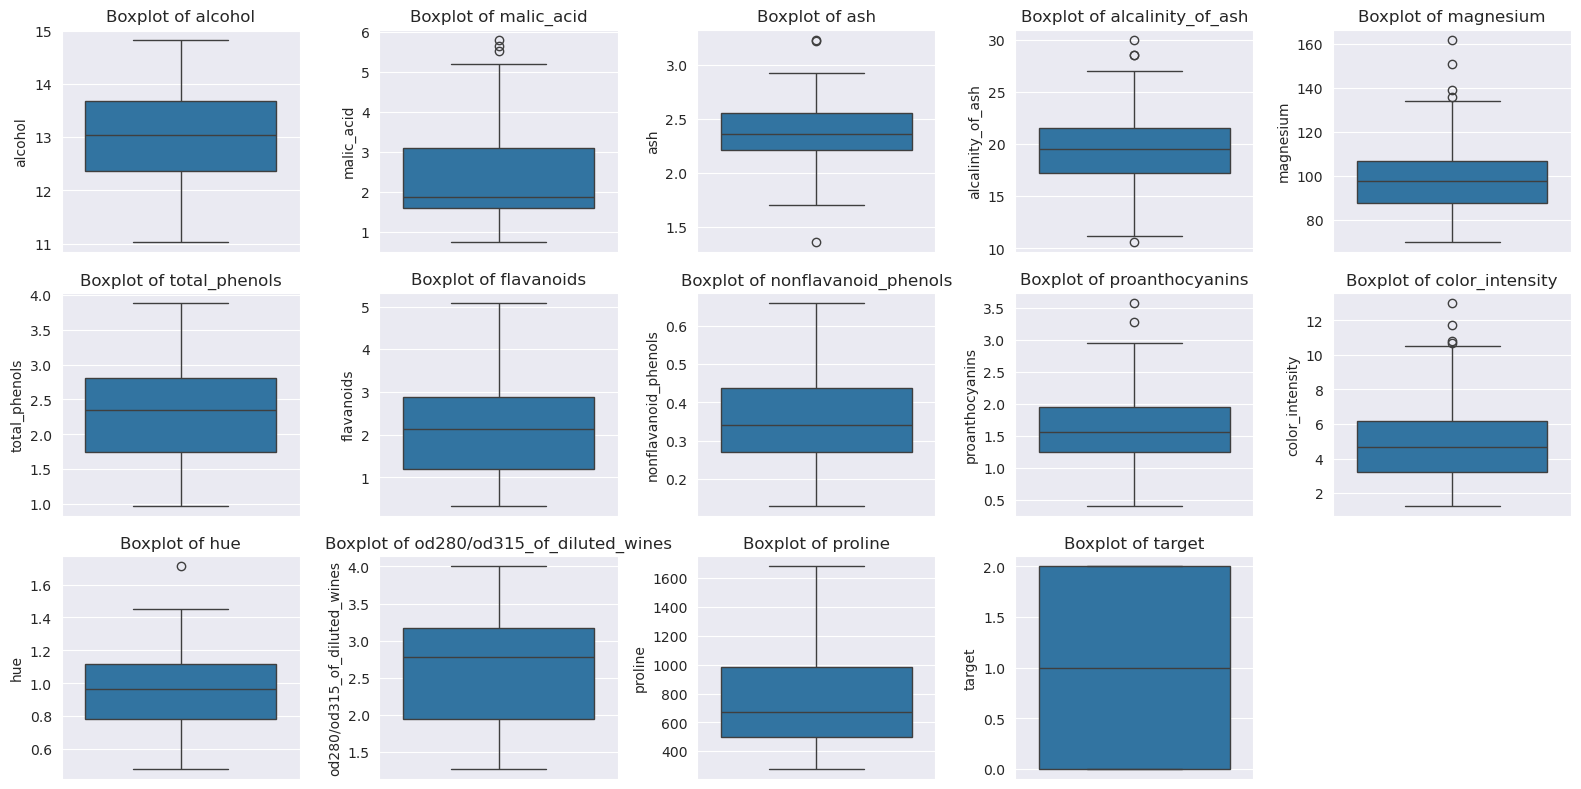

In [3]:
# Cek Outlier
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a boxplot for each feature in the dataframe
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [6]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target'])
y = df['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.fit_transform(X_test)

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

In [21]:
# bangun model
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.005,
    max_depth=5,
    subsample=0.89,
    colsample_bytree=0.89
)

model.fit(
    X_train_sub,
    y_train_sub,
    eval_set=[(X_val, y_val)],
    verbose=True
)

y_pred = model.predict(X_test_scaled)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

[0]	validation_0-rmse:0.75976
[1]	validation_0-rmse:0.75623
[2]	validation_0-rmse:0.75257
[3]	validation_0-rmse:0.74893
[4]	validation_0-rmse:0.74532
[5]	validation_0-rmse:0.74173
[6]	validation_0-rmse:0.73814
[7]	validation_0-rmse:0.73469
[8]	validation_0-rmse:0.73120
[9]	validation_0-rmse:0.72768
[10]	validation_0-rmse:0.72418
[11]	validation_0-rmse:0.72071
[12]	validation_0-rmse:0.71728
[13]	validation_0-rmse:0.71384
[14]	validation_0-rmse:0.71051
[15]	validation_0-rmse:0.70711
[16]	validation_0-rmse:0.70373
[17]	validation_0-rmse:0.70038
[18]	validation_0-rmse:0.69703
[19]	validation_0-rmse:0.69371
[20]	validation_0-rmse:0.69050
[21]	validation_0-rmse:0.68723
[22]	validation_0-rmse:0.68395
[23]	validation_0-rmse:0.68072
[24]	validation_0-rmse:0.67747
[25]	validation_0-rmse:0.67443
[26]	validation_0-rmse:0.67123
[27]	validation_0-rmse:0.66806
[28]	validation_0-rmse:0.66509
[29]	validation_0-rmse:0.66221
[30]	validation_0-rmse:0.65918
[31]	validation_0-rmse:0.65623
[32]	validation_0-

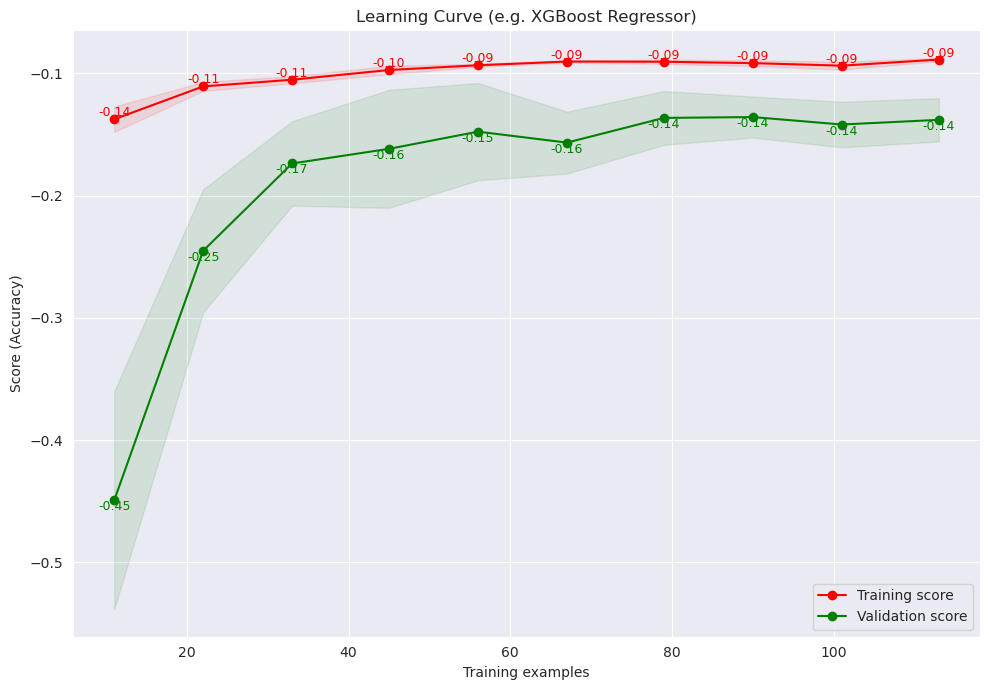

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train,
    cv=5,
    scoring='neg_mean_squared_error',  # GANTI kalau ini buat klasifikasi
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

# Tambahin label angka di titik kurva
for x, y in zip(train_sizes, train_scores_mean):
    plt.text(x, y, f"{y:.2f}", color='r', fontsize=9, ha='center', va='bottom')
for x, y in zip(train_sizes, test_scores_mean):
    plt.text(x, y, f"{y:.2f}", color='g', fontsize=9, ha='center', va='top')

# Setup axis dan tampilan
plt.title("Learning Curve (e.g. XGBoost Regressor)")
plt.xlabel("Training examples")
plt.ylabel("Score (Accuracy)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()
